# Importing Essential Libraries

In [1]:
from pprint import pprint # pretty print sometimes helps printing the data more distinguished
import time # to measure execution time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For reading and writing datasets
import csv
import json

# For clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# For plotting
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Business dataset:

In [2]:
# Read the json file
df_business = pd.read_json("/kaggle/input/yelp-dataset/yelp_academic_dataset_business.json", lines=True)

df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,Eleven Oaks Realty,,Austin,TX,78701,30.272921,-97.744386,4.0,8,1,None,"Real Estate, Real Estate Services, Home Servic...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ..."
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Health Markets, Food, Specialty Food, Grocery","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,2164 S Chickasaw Trl,Orlando,FL,32825,28.511615,-81.270020,5.0,8,0,"{'DogsAllowed': 'False', 'ByAppointmentOnly': ...","Arts & Entertainment, Paint & Sip, Art Classes...","{'Monday': '0:0-0:0', 'Wednesday': '12:0-17:0'..."
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Cuban, Sandwiches, Restaurants, Cafes",None


# Data Cleaning for the Business dataset
Correct or replace any issue of:
* Misspellings {Montgromery street}
* Outliers {1,2,4,2,4,123,3,4}
* Incorrect values {invalid zip, neg number}
* Missing values {6,7,4,3,,4,5,6}
* Incorrect values {94025, -345,96066,…}
* Misspellings {Montgromery street}
* Outliers {1,2,4,2,4,123,3,4}
* Incorrect values {invalid zip, neg number}
* Missing values {6,7,4,3,,4,5,6}
* Incorrect values {94025, -345,96066,…}
* Checking for NAN, 0, invalid inputs, null
* Looking into required columns & dataset


In [3]:
# Check to see if any of there is any business without business_id
print("There are", df_business['business_id'].isnull().values.sum(), "businesses without a business_id.")

There are 0 businesses without a business_id.


In [4]:
# Check to see if any of there is any business without category
print("There are", df_business['categories'].isnull().values.sum(), "businesses without categories.")

There are 115 businesses without categories.


In [5]:
# Look at the businesses without category
df_business[df_business['categories'].isnull()]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
804,EzXlnsWtBuRJw8avEMfBqw,AAA Cooper Transportation,1215 Wells Branch Pkwy,Pflugerville,TX,78660,30.438466,-97.661296,1.0,5,1,None,None,None
1725,VD_mB3i4GG-Ra-sFqlxzeA,Parkway Cleansing Center,695 Truman Hwy,Hyde Park,MA,02136,42.252549,-71.118810,3.0,6,1,None,None,None
2549,dp5RVEVtI8ZVW9xEZtcICw,Value Dry of Massachusetts,41 Belvidere St,Boston,MA,02115,42.346084,-71.085850,3.0,9,1,None,None,None
4342,ZyTTidbFgZPTk96ZS0li3A,Mail House Plus,4230 SE King Rd,Portland,OR,97222,45.447562,-122.619243,3.5,9,1,None,None,None
4676,AVfEUwqD-OoKXMB4LETcIw,Praxair Distribution,2801 Montopolis Dr,Austin,TX,78741,30.215451,-97.708661,3.5,5,1,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154464,I5wUBQDutIW-jsSPn1T-NA,Pilot Travel Center Number 344,4600 S Atlanta Rd SE,Smyrna,GA,30080,33.841019,-84.486094,2.0,10,0,None,None,None
157566,YczmQNLQ3QU6rbhlvSPObQ,Lee's Famous Recipe Chicken Corporate Headquar...,3343 Perimeter Hill Dr,Atlanta,GA,30303,33.914169,-84.294707,1.0,6,0,None,None,None
157613,-myDIHHnDp9elxbwkuUTog,Kel-Tec Cnc Industries,1485 Cox Rd,Cocoa,FL,32926,28.381731,-80.788720,3.0,11,1,None,None,None
158707,tL4FTK3nH3UyMogikY1ckg,Angie's List,2358 E Main St,Columbus,OH,43209,39.957405,-82.935903,1.0,31,1,None,None,None


In [6]:
# Deleting the business with NAN in the categories column
df_business = df_business.dropna(subset=['categories'])
# To address this change in all other datasets, we may eliminate the rows that don't have a matching busness_id with this one.

#  Category distribution visualization
### Step 1: Pre-processing for the sub-categories:
The goal of this step is to extract the number of businesses associated with each individual business. (In other words we want to build a dataframe that has all the categories as index and a column that shows an integer, which is the number of businesses that have that specific category in their business description)

In [7]:
# A business can have multiple categories separated by comma.
# Make a list of strings for each business (instead of the one-string situation).
df_categories = pd.DataFrame(df_business['categories'].apply(lambda x: x.split(', ') if x is not None else []))

# Explode the categories to have individual rows of one business_id and one category related to it.
# (We'll get redundant business_ids, and that's fine.)
df_categories_exploded = df_categories.explode('categories').groupby('categories')

In [8]:
# Count the similar categories.
cat_count = pd.DataFrame(df_categories_exploded.categories.value_counts())

# In the previous process the dataframe had gotten two duplicated indexes (MultiIndex). So, we drop one of them.
cat_count = cat_count.droplevel(1)

# Since the indexes start with "categories",
# the column name is changed to "counts" to prevent any mistake in the future.
cat_count = cat_count.rename(columns={'categories': 'counts'})

# Now we can sort by "counts" confidently, knowing that it's not taking the other name in consideration.
cat_count = cat_count.sort_values(by="counts", ascending=False)

cat_count

,counts
categories,
Restaurants,50763
Food,29469
Shopping,26205
Beauty & Spas,16574
Home Services,16465
...,...
Beer Garden,1
Castles,1
Bike Parking,1


### Step 2: Pre-processing for the main categories:

Categories in the Yelp dataset are grouped into main categories

In [9]:
# This is a dictionary that maps the main categories to the number of businesses in the sub-categories of that main category.
main_categories = {"Active Life": 0, "Arts and Entertainment": 0, "Automotive": 0,
                   "Beauty and Spas": 0, "Education": 0, "Event Planning and Services": 0,
                   "Financial Services": 0, "Food": 0, "Health and Medical": 0,
                   "Home Services": 0, "Hotels and Travel": 0, "Local Flavor": 0,
                   "Local Services": 0, "Mass Media": 0, "Nightlife": 0,
                   "Pets": 0, "Professional Services": 0, "Public Services and Government": 0,
                   "Real Estate": 0, "Religious Organizations": 0, "Restaurants": 0, "Shopping": 0}

In [10]:
# Counter function
'''Parameters
        df: a dataframe of categories as indexes and their counts as the only column
        category_group: an string array of main categories
        
   Returns the number of businesses in that category group
'''           
def sub_category_counter(df, category_group):
    counter = 0
    for index, row in df.iterrows():
        if index in category_group:
            counter = counter + row['counts']
    return counter

In [11]:
# For each main category do the following.
for cat in main_categories:
    
    # Read the sub-categories of cat category.
    path = "../input/yelpcategorytitles/" + cat + ".txt"
    sub_categories = open(path, "r")
    
    sub_categories = [x.strip() for x in sub_categories]
    
    # Count the sub-categories using the function above.
    main_categories[cat] = sub_category_counter(cat_count, sub_categories)

In [12]:
# Finally, sort the main categories counts for a better visualization.
main_categories_sorted = {k: v for k, v in sorted(main_categories.items(),
                                                  key=lambda item: item[1],
                                                  reverse=True)}

### Step 3: Plotting the category distribution:

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


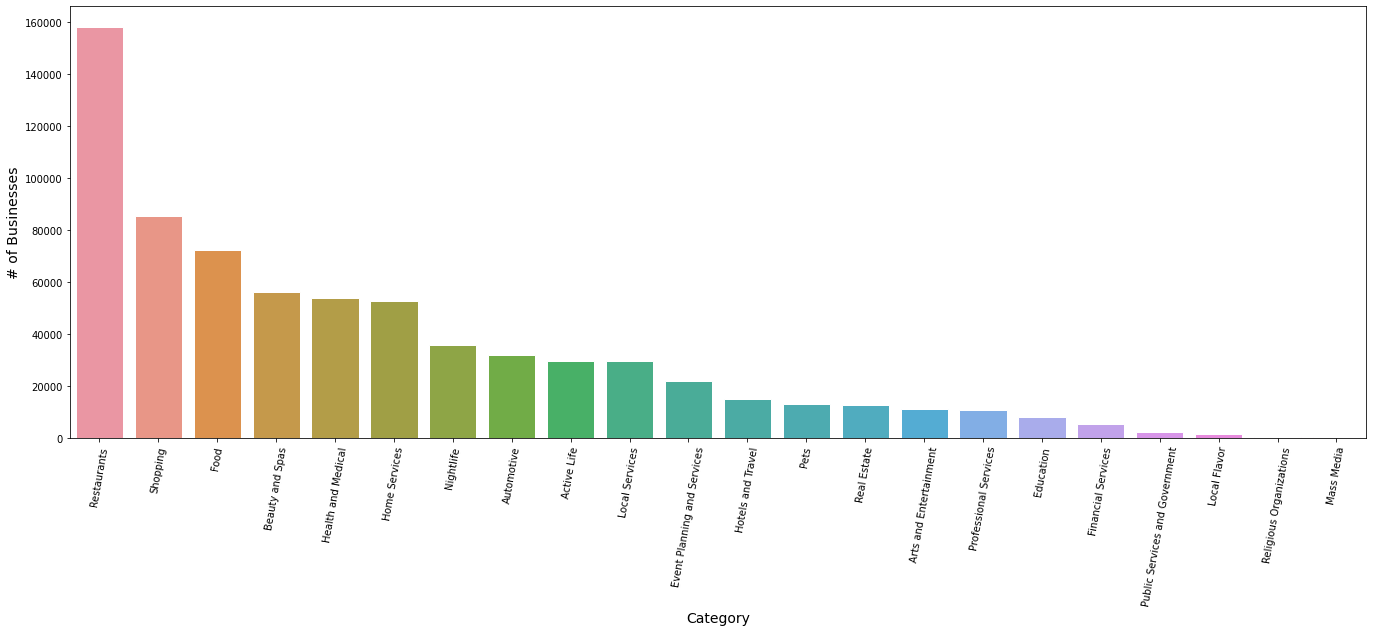

In [13]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_axes([0,0,1,1])
ax = sns.set_theme(style="whitegrid")
ax = sns.barplot(list(main_categories_sorted.keys()), list(main_categories_sorted.values()))

plt.xticks(rotation=80)
plt.ylabel('# of Businesses', fontsize=14)
plt.xlabel('Category', fontsize=14)

plt.show()

# Other visualizations


# Analyzing the data to extract the traffic of each business:


### Step 1: Converting the Traffic datasets from JSON to CSV:

In [14]:
traffic_header = ['business_id', 'weighted_stars', 'date']

In [15]:
''' Tip dataset '''

start_t = time.time()
with open("/kaggle/input/yelp-dataset/yelp_academic_dataset_tip.json") as f:
    with open("/kaggle/working/yelp_academic_dataset_traffic.csv", 'w') as out:
        
        traffic_writer = csv.writer(out)
        traffic_writer.writerow(traffic_header)
        
        for line in f:
            line_dict = json.loads(line)
            traffic_writer.writerow([line_dict['business_id'],
                                     None,
                                     line_dict['date']])

print(time.time() - start_t)

7.249969005584717


In [16]:
''' Review dataset '''

start_t = time.time()
with open("/kaggle/input/yelp-dataset/yelp_academic_dataset_review.json") as f:
    with open("/kaggle/working/yelp_academic_dataset_traffic.csv", 'a') as out:
        
        traffic_writer = csv.writer(out)
        
        for line in f:
            line_dict = json.loads(line)
            
            # The more engagement a review has, the more reliable it is. However, since it can be zero, we add 1 to balance it.
            # If the engagement is zero, then star_reliability equals 1, and its multiplication by star wouldn't be effective.
            star_reliability = line_dict['useful'] + line_dict['funny'] + line_dict['cool'] + 1

            traffic_writer.writerow([line_dict['business_id'],
                                     line_dict['stars'] * star_reliability,
                                     line_dict['date']])

print(time.time() - start_t)

132.9106273651123


In [17]:
''' Check-in dataset '''

start_t = time.time()

with open("/kaggle/input/yelp-dataset/yelp_academic_dataset_checkin.json") as f:
    with open("/kaggle/working/yelp_academic_dataset_traffic.csv", 'a') as out:
        
        traffic_writer = csv.writer(out)
        
        for line in f:
            line_dict = json.loads(line)
            
            checkin_dates = line_dict['date'].split(', ')

            if len(checkin_dates) == 0:
                checkin_dates = [line_dict['date']]
            # If there's one or more than one date, store them one by one.
            for date in checkin_dates:
                traffic_writer.writerow([line_dict['business_id'],
                                         None,
                                         date])

print(time.time() - start_t)

26.731886386871338


### Step 2: Reading the Traffic datasets (new csv file) using [Dask](https://docs.dask.org/en/latest/dataframe.html):

Another alternative is using [chunksize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [18]:
import dask.dataframe as dd

dd_traffic = dd.read_csv("./yelp_academic_dataset_traffic.csv", parse_dates=['date'])

### Step 3: Prune the Traffic datasets (delete the ones that are not in business dataset)

In [19]:
# It might take a little while, because it's reading in chunks and computing on all.
df_traffic = dd_traffic[dd_traffic.business_id.isin(df_business.business_id)].compute()
df_traffic

,business_id,weighted_stars,date
0,ENwBByjpoa5Gg7tKgxqwLg,NaN,2011-07-22 19:07:35
1,jKO4Og6ucdX2-YCTKQVYjg,NaN,2014-09-10 07:33:29
2,9Bto7mky640ocgezVKSfVg,NaN,2013-12-13 23:23:41
3,XWFjKtRGZ9khRGtGg2ZvaA,NaN,2017-07-11 23:07:16
4,mkrx0VhSMU3p3uhyJGCoWA,NaN,2016-11-30 08:46:36
...,...,...,...
634435,zzwK-TJsCJX5wZrdtKemPg,NaN,2012-10-02 14:32:18
634436,zzwK-TJsCJX5wZrdtKemPg,NaN,2012-11-29 22:23:01
634437,zzwK-TJsCJX5wZrdtKemPg,NaN,2014-04-24 23:22:41
634438,zzzKmD9Mj6WtJwJUhA_1dg,NaN,2010-12-25 22:17:04


# Identifying the influential variables of each category
### Step 1: Calculating the lifetime of businesses (the _classes_ or _y_ of our final training dataset).
df_traffic now contains all kinds of interactions documented by people, whether it's a review someone's written, a tip someone's given, or a check-in date that has been registered. The first interaction would be the date that store/business started their work. Similarly, the last date registered displays the closed date. However, there's one additional information in the df_business that comes in handy! To be more accurate, if the _is_open_ is 1, we set the closed date to *None* since it's no longer the closed date but the last date.

Note! Fortunately, there was at least one review for each business (17294 businesses were found).

In [20]:
grouped_traffic = df_traffic.groupby(by='business_id')

# Lifetime = Last date - first date
first_date = grouped_traffic['date'].min()
last_date = grouped_traffic['date'].max()
# We only keep the days and eliminate the overhead hours/minutes/seconds
lifetime = (last_date.subtract(first_date)).dt.days

# Traffic = Number of tips, reviews, and check-ins
traffic = grouped_traffic.size()

# weighted_stars = The average of all weighted stars (that are not Null)
weighted_stars = df_traffic.dropna(subset=['weighted_stars']).groupby(by='business_id')['weighted_stars'].mean()

df_traffic_results =  pd.concat([traffic, weighted_stars, lifetime], axis=1, keys=['traffic', 'weighted_stars', 'lifetime'])
df_traffic_results

,traffic,weighted_stars,lifetime
business_id,,,
--0DF12EMHYI8XIgoFha6A,6,6.166667,2217
--0r8K_AQ4FZfLsX3ZYRDA,6,8.000000,954
--0zrn43LEaB4jUWTQH_Bg,16,4.666667,876
--164t1nclzzmca7eDiJMw,496,21.333333,1910
--2aF9NhXnNVpDV0KS3xBQ,18,6.111111,4528
...,...,...,...
zzpmoTVq4yn86U7ArHyFBQ,96,21.361111,193
zzqq8J7Pibxod1YcknlkWA,13,7.400000,1170
zzwK-TJsCJX5wZrdtKemPg,35,16.863636,3220


### Step 2: Merging the data together
Note that we kept the business_id all over different datasets to be able to glue the dataset back together later. Once we do this, we don't care about it anymore. We merge the df_dates which we just gathered to df_business which we had from before.

In [21]:
# Merge based on business_id: df_traffic_results + df_business.
df_merged_business = df_business.join(df_traffic_results, on='business_id')

# We collect the columns that might have an influence in a business' lifetime
df_influential_vars = df_merged_business[['business_id', 'categories', 'latitude','longitude',
                                          'traffic', 'stars', 'weighted_stars', 'lifetime']]

df_influential_vars = df_influential_vars.reset_index()
df_influential_vars.pop('index')
df_influential_vars

,business_id,categories,latitude,longitude,traffic,stars,weighted_stars,lifetime
0,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",40.017544,-105.283348,277,4.0,7.825581,1231
1,tCbdrRPZA0oiIYSmHG3J0w,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",45.588906,-122.593331,1356,4.0,18.093023,3971
2,bvN78flM8NLprQ1a1y5dRg,"Antiques, Fashion, Used, Vintage & Consignment...",45.511907,-122.613693,58,4.5,13.769231,2268
3,oaepsyvc0J17qwi8cfrOWg,"Beauty & Spas, Hair Salons",28.914482,-81.295979,36,3.0,5.444444,3116
4,PE9uqAjdw0E4-8mjGl3wVA,"Gyms, Active Life, Interval Training Gyms, Fit...",33.747027,-84.353424,68,4.0,14.142857,1812
...,...,...,...,...,...,...,...,...
160465,D2mHoIDXx9N8mS1pGoKV9Q,"Real Estate, Real Estate Services, Home Servic...",30.272921,-97.744386,9,4.0,5.750000,1541
160466,bQX-kwVTyZgcdZGEPzce6Q,"Health Markets, Food, Specialty Food, Grocery",28.499836,-81.047478,47,4.5,63.631579,3720
160467,wvFZ06nmPmQ2-IVoPqVYLA,"Arts & Entertainment, Paint & Sip, Art Classes...",28.511615,-81.270020,12,5.0,18.625000,755
160468,GB75wPibj3IjNauaoCxyGA,"Cuban, Sandwiches, Restaurants, Cafes",45.529647,-122.685153,15,4.0,8.000000,144


### A couple of observations!
Before we proceed to calculate the influnetial metrics, let's be sure of some values. To make a metric we have to come up with a combination of arithmetic operations. So, we have to know if there are any zeros in the values we want to work with.

In [22]:
# Is there any business with no traffic count?
print("There are", (df_merged_business['traffic'] == 0).sum(),
      "businesses without any traffic registered.")

# Is there any busniess with zero lifetime?
print("There are", (df_merged_business['lifetime'] == 0).sum(),
      "businesses with zero lifetime.")

There are 0 businesses without any traffic registered.
There are 2 businesses with zero lifetime.


### Step 3: Embedding categories (convert them to vectors)

In [23]:
#Sentence Encoding Model (Word to vector)

# Counter function
'''Parameters
        category_series: it expects a column of strings of categories as input.
        
   Returns vectors of the input categories. So that each business has a vector that shows its categories.
   For example if we have 7 categories overall, instead of [chicken, Food] it now has [1, 0, 0, 0, 1, 0, 0].
'''    

def get_business_cat_vector(category_series):
    global cat_count

    category_df = pd.DataFrame(category_series.apply(lambda x: x.split(', ') if x is not None else []),
                               columns=['categories']).reset_index(drop=True)
    
    neighbourhood_cats = category_df.explode('categories').drop_duplicates()
    category_df[list(neighbourhood_cats['categories'])] = 0

    def set_count(row):
        for cat in row['categories']:
            row[cat] = 1
        return(row)
    
    counts_df = category_df.apply(set_count, axis=1).drop('categories', axis=1).transpose()
    all_cats_df = pd.DataFrame(cat_count.index).join(counts_df, on=['categories'])
    all_counts_df = all_cats_df.fillna(0).transpose().drop('categories')
    vectors_df = all_counts_df.apply(lambda x: x.astype('int32').to_numpy(), axis=1)
    return vectors_df

In [24]:
# Convert categories to vectors
category_vectors = get_business_cat_vector(df_influential_vars['categories'])
category_vectors_np = np.stack(category_vectors.to_numpy())

# Run PCA
According to the documentation, PCA is a tool that helps us shrink the data without losing any information. We run the PCA on the category vectors. They used to have 915 columns as it was the number of categories in the dataset. And now, it has 100.

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(category_vectors_np)
category_vectors_pca = pca.transform(category_vectors_np)

# category_vectors_pca = category_vectors_np
df_cat_vec = pd.DataFrame(category_vectors_pca,
                          columns=['cat_'+ str(i) for i in range(category_vectors_pca.shape[1])])
df_cat_vec

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,...,cat_90,cat_91,cat_92,cat_93,cat_94,cat_95,cat_96,cat_97,cat_98,cat_99
0,1.313083,0.084707,-0.248188,0.358848,1.039753,-0.353176,-0.174334,-0.179187,0.146683,-0.000654,...,-0.078770,0.033129,0.043370,-0.114733,-0.184630,0.097831,0.071391,0.061034,-0.004535,0.087474
1,0.777270,-0.115537,-0.151385,0.013272,-0.593590,0.139843,-0.029928,0.006300,0.004290,-0.014962,...,-0.060526,-0.002882,0.026269,-0.117296,0.036632,-0.004185,-0.047415,-0.142043,-0.114463,-0.126991
2,-0.678428,0.965115,-0.445310,0.609056,-0.228065,0.059294,-0.013917,-0.148678,-0.020164,-0.310631,...,0.033258,-0.029073,0.006813,-0.005751,0.005375,0.016071,0.018539,0.073693,0.007081,-0.043904
3,-0.438010,-0.550623,0.397866,0.413612,-0.178296,-0.610435,0.115236,0.073296,0.048547,-0.003323,...,-0.081098,-0.069244,-0.036485,-0.060500,-0.018831,0.008653,-0.269423,0.159621,0.051730,-0.044671
4,-0.343335,-0.256624,0.043758,-0.133104,0.213168,0.519805,0.158895,0.932529,0.814725,-0.518375,...,-0.000989,-0.003162,-0.008277,-0.008380,0.011165,0.006354,0.000875,-0.029588,0.036856,-0.029384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160465,-0.438357,-0.102142,-0.300175,-0.915884,-0.022265,-0.493201,-0.573904,-0.073891,-0.114594,-0.495769,...,-0.007589,-0.005986,-0.008966,-0.006246,-0.003230,0.008703,-0.007324,-0.050783,-0.007098,-0.013426
160466,0.156910,0.504681,0.797978,-0.233558,0.365075,-0.099357,0.005570,0.007939,0.016320,0.009034,...,-0.005251,0.008378,0.005293,-0.027061,-0.028883,0.003185,0.024730,-0.021377,0.005611,0.005160
160467,-0.254280,-0.098954,-0.049552,-0.083753,0.155628,0.070052,0.157979,0.206400,-0.015510,0.041721,...,-0.012605,0.003420,-0.013685,-0.000124,0.009973,0.017953,0.005877,-0.061236,-0.008326,-0.015279
160468,0.669452,-0.128442,-0.156194,0.005982,-0.508870,0.125689,-0.011513,0.000575,0.014306,-0.011675,...,-0.031773,-0.012164,-0.027665,0.012243,0.009447,-0.008982,-0.000404,-0.021871,0.035222,0.058721


In [26]:
# Add the vectors to the train dataframe
df_train = pd.concat([df_influential_vars, df_cat_vec], axis=1)

# Convert days to years
df_train['lifetime'] = (df_train['lifetime'] / 365).astype('int')
df_train

,business_id,categories,latitude,longitude,traffic,stars,weighted_stars,lifetime,cat_0,cat_1,...,cat_90,cat_91,cat_92,cat_93,cat_94,cat_95,cat_96,cat_97,cat_98,cat_99
0,6iYb2HFDywm3zjuRg0shjw,"Gastropubs, Food, Beer Gardens, Restaurants, B...",40.017544,-105.283348,277,4.0,7.825581,3,1.313083,0.084707,...,-0.078770,0.033129,0.043370,-0.114733,-0.184630,0.097831,0.071391,0.061034,-0.004535,0.087474
1,tCbdrRPZA0oiIYSmHG3J0w,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",45.588906,-122.593331,1356,4.0,18.093023,10,0.777270,-0.115537,...,-0.060526,-0.002882,0.026269,-0.117296,0.036632,-0.004185,-0.047415,-0.142043,-0.114463,-0.126991
2,bvN78flM8NLprQ1a1y5dRg,"Antiques, Fashion, Used, Vintage & Consignment...",45.511907,-122.613693,58,4.5,13.769231,6,-0.678428,0.965115,...,0.033258,-0.029073,0.006813,-0.005751,0.005375,0.016071,0.018539,0.073693,0.007081,-0.043904
3,oaepsyvc0J17qwi8cfrOWg,"Beauty & Spas, Hair Salons",28.914482,-81.295979,36,3.0,5.444444,8,-0.438010,-0.550623,...,-0.081098,-0.069244,-0.036485,-0.060500,-0.018831,0.008653,-0.269423,0.159621,0.051730,-0.044671
4,PE9uqAjdw0E4-8mjGl3wVA,"Gyms, Active Life, Interval Training Gyms, Fit...",33.747027,-84.353424,68,4.0,14.142857,4,-0.343335,-0.256624,...,-0.000989,-0.003162,-0.008277,-0.008380,0.011165,0.006354,0.000875,-0.029588,0.036856,-0.029384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160465,D2mHoIDXx9N8mS1pGoKV9Q,"Real Estate, Real Estate Services, Home Servic...",30.272921,-97.744386,9,4.0,5.750000,4,-0.438357,-0.102142,...,-0.007589,-0.005986,-0.008966,-0.006246,-0.003230,0.008703,-0.007324,-0.050783,-0.007098,-0.013426
160466,bQX-kwVTyZgcdZGEPzce6Q,"Health Markets, Food, Specialty Food, Grocery",28.499836,-81.047478,47,4.5,63.631579,10,0.156910,0.504681,...,-0.005251,0.008378,0.005293,-0.027061,-0.028883,0.003185,0.024730,-0.021377,0.005611,0.005160
160467,wvFZ06nmPmQ2-IVoPqVYLA,"Arts & Entertainment, Paint & Sip, Art Classes...",28.511615,-81.270020,12,5.0,18.625000,2,-0.254280,-0.098954,...,-0.012605,0.003420,-0.013685,-0.000124,0.009973,0.017953,0.005877,-0.061236,-0.008326,-0.015279
160468,GB75wPibj3IjNauaoCxyGA,"Cuban, Sandwiches, Restaurants, Cafes",45.529647,-122.685153,15,4.0,8.000000,0,0.669452,-0.128442,...,-0.031773,-0.012164,-0.027665,0.012243,0.009447,-0.008982,-0.000404,-0.021871,0.035222,0.058721


# Supervised Learning

In [ ]:
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score
import sklearn

# We don't want to change the actual df_train, so we get a copy of that.
df_temp = df_train.copy()
# df_temp = df_temp[df_temp['categories'].str.contains('Shopping')]

df_temp.pop('business_id')
df_temp.pop('categories')
y = df_temp.pop('lifetime').to_numpy().astype('float')
X = df_temp.to_numpy().astype('float')

# Sometimes scaling helps the modeling to classify better.
# X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.01, random_state=10, shuffle=True)

LR = LinearRegression().fit(X_train, y_train).predict(X_test)
LGR = LogisticRegression(random_state=0).fit(X_train, y_train).predict(X_test)
SVM = SVC(kernel='rbf').fit(X_train, y_train).predict(X_test)
GNB = GaussianNB().fit(X_train, y_train).predict(X_test)
DT = DecisionTreeClassifier().fit(X_train, y_train).predict(X_test)

y_pred = np.mean(np.array((np.transpose(LR), np.transpose(LGR), np.transpose(SVM), np.transpose(GNB), np.transpose(DT))), axis=0)

# print('PRED: ', y_pred)
# print('ACTUAL: ', y_test)

print('LR:', sklearn.metrics.mean_squared_error(y_test, LR, squared=False))
print('LGR:', sklearn.metrics.mean_squared_error(y_test, LGR, squared=False))
print('SVM:', sklearn.metrics.mean_squared_error(y_test, SVM, squared=False))
print('GNB:', sklearn.metrics.mean_squared_error(y_test, GNB, squared=False))
print('DT:', sklearn.metrics.mean_squared_error(y_test, DT, squared=False))
print('Total:', sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False))

# Unsupervised Learning
### Clustering algorithm:

In [ ]:
coords = df_business[['longitude', 'latitude']].to_numpy()

cutoff = 0.0045

clustering = AgglomerativeClustering(None, linkage='complete', distance_threshold=cutoff)
cluster_ids = clustering.fit_predict(coords)

df_business['neighbourhood'] = cluster_ids # ignore warning

print("The number of neighbourhoods found in BC is:", max(cluster_ids))

# Clustering Visualization

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Plot neighborhoods

# filter out some weird businesses in NE Ontario for plotting
plot_clusters = cluster_ids[coords[:,0] < -74.5]
plot_coords = coords[coords[:,0] < -74.5]

def get_color(value):
    cycle = 20
    scale = cm.get_cmap('tab20', 12)
    color_value = (value % cycle) / (cycle - 1)
    return scale(color_value)

# large figure
plt.figure(figsize=(12,8), dpi= 400)

colors = []
for i, label in enumerate(plot_clusters):
    colors.append(get_color(int(label)))

plt.scatter(plot_coords[:,0], plot_coords[:,1], c=colors, s=1)

plt.show()

### Another visualization for the neighbourhoods that also clusters them realtime:

In [ ]:
import folium
from folium.plugins import FastMarkerCluster

lats = df_business['latitude'].tolist()
lons = df_business['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[49.2827, -123.1207],
                        tiles = "Stamen Terrain",
                        zoom_start = 12)
FastMarkerCluster(data=locations).add_to(map1)
map1

### Using Kmeans to cluster the businesses into different neighbourhoods:

In [ ]:
x = df_business.iloc[:, [6 ,7]].values
cluster_range = range(1225, 1235)


wcss = []
for i in cluster_range:
    print("looking at cluster: ", i)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(cluster_range, wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

### Using Elbow Method to find the best K:

In [ ]:
# Small K

from yellowbrick.cluster import KElbowVisualizer
    
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
# Large K

#Clustering based on elbow results
kmeans = KMeans(n_clusters = 1231, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

fig, ax = plt.subplots(figsize=(12,8), dpi= 400)
ax.scatter(x[:,1], x[:,0], c=y_kmeans, alpha=0.9, s = 1, cmap='jet') # c is colour


#Plotting the centroids of the clusters
ax.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,0], s = 50, c = 'pink', label = 'Centroids', alpha=0.3)

# plt.legend()
plt.show()

In [ ]:
class PreProcessText(object):
    def __init__(self):
        pass
    
    def __remove_punctuation(self, text):
        """
        Takes a String 
        return : Return a String 
        """
        message = []
        for x in text:
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)
        
        return message
    
    def __remove_stopwords(self, text):
        """
        Takes a String
        return List
        """
        words= []
        for x in text.split():

            if x.lower() in stopwords.words('english'):
                pass
            else:
                words.append(x)
        return words
    
    
    def token_words(self,text=''):
        """
        Takes String
        Return Token also called  list of words that is used to 
        Train the Model 
        """
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)

In [ ]:
df = pd.read_csv('yelp.csv')
df = df[(df["stars"]==1) | (df["stars"]==5)]
X_Data = df["text"]
Y_Data = df["stars"]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)


obj = PreProcessText()
pipe = Pipeline([('bow',CountVectorizer(analyzer=obj.token_words)),
                 ('tfidf',TfidfTransformer()),
                 ('model', LinearRegression())])
val = pipe.fit(X_Train,Y_Train)